In [91]:
# Importing modules to be used in analysis
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Getter current working directory and loading it to variable cwd
cwd = os.getcwd()

# Importing AccidentsFinal.csv for analysis
dfAcc = pd.read_csv(cwd + '\Data\Clean\AccidentsFinal.csv')



## Total Accidents by State
For the first visualization we are going to see the total number of accidents per state in the continental US for the timeframe of collected data (2016-2023).

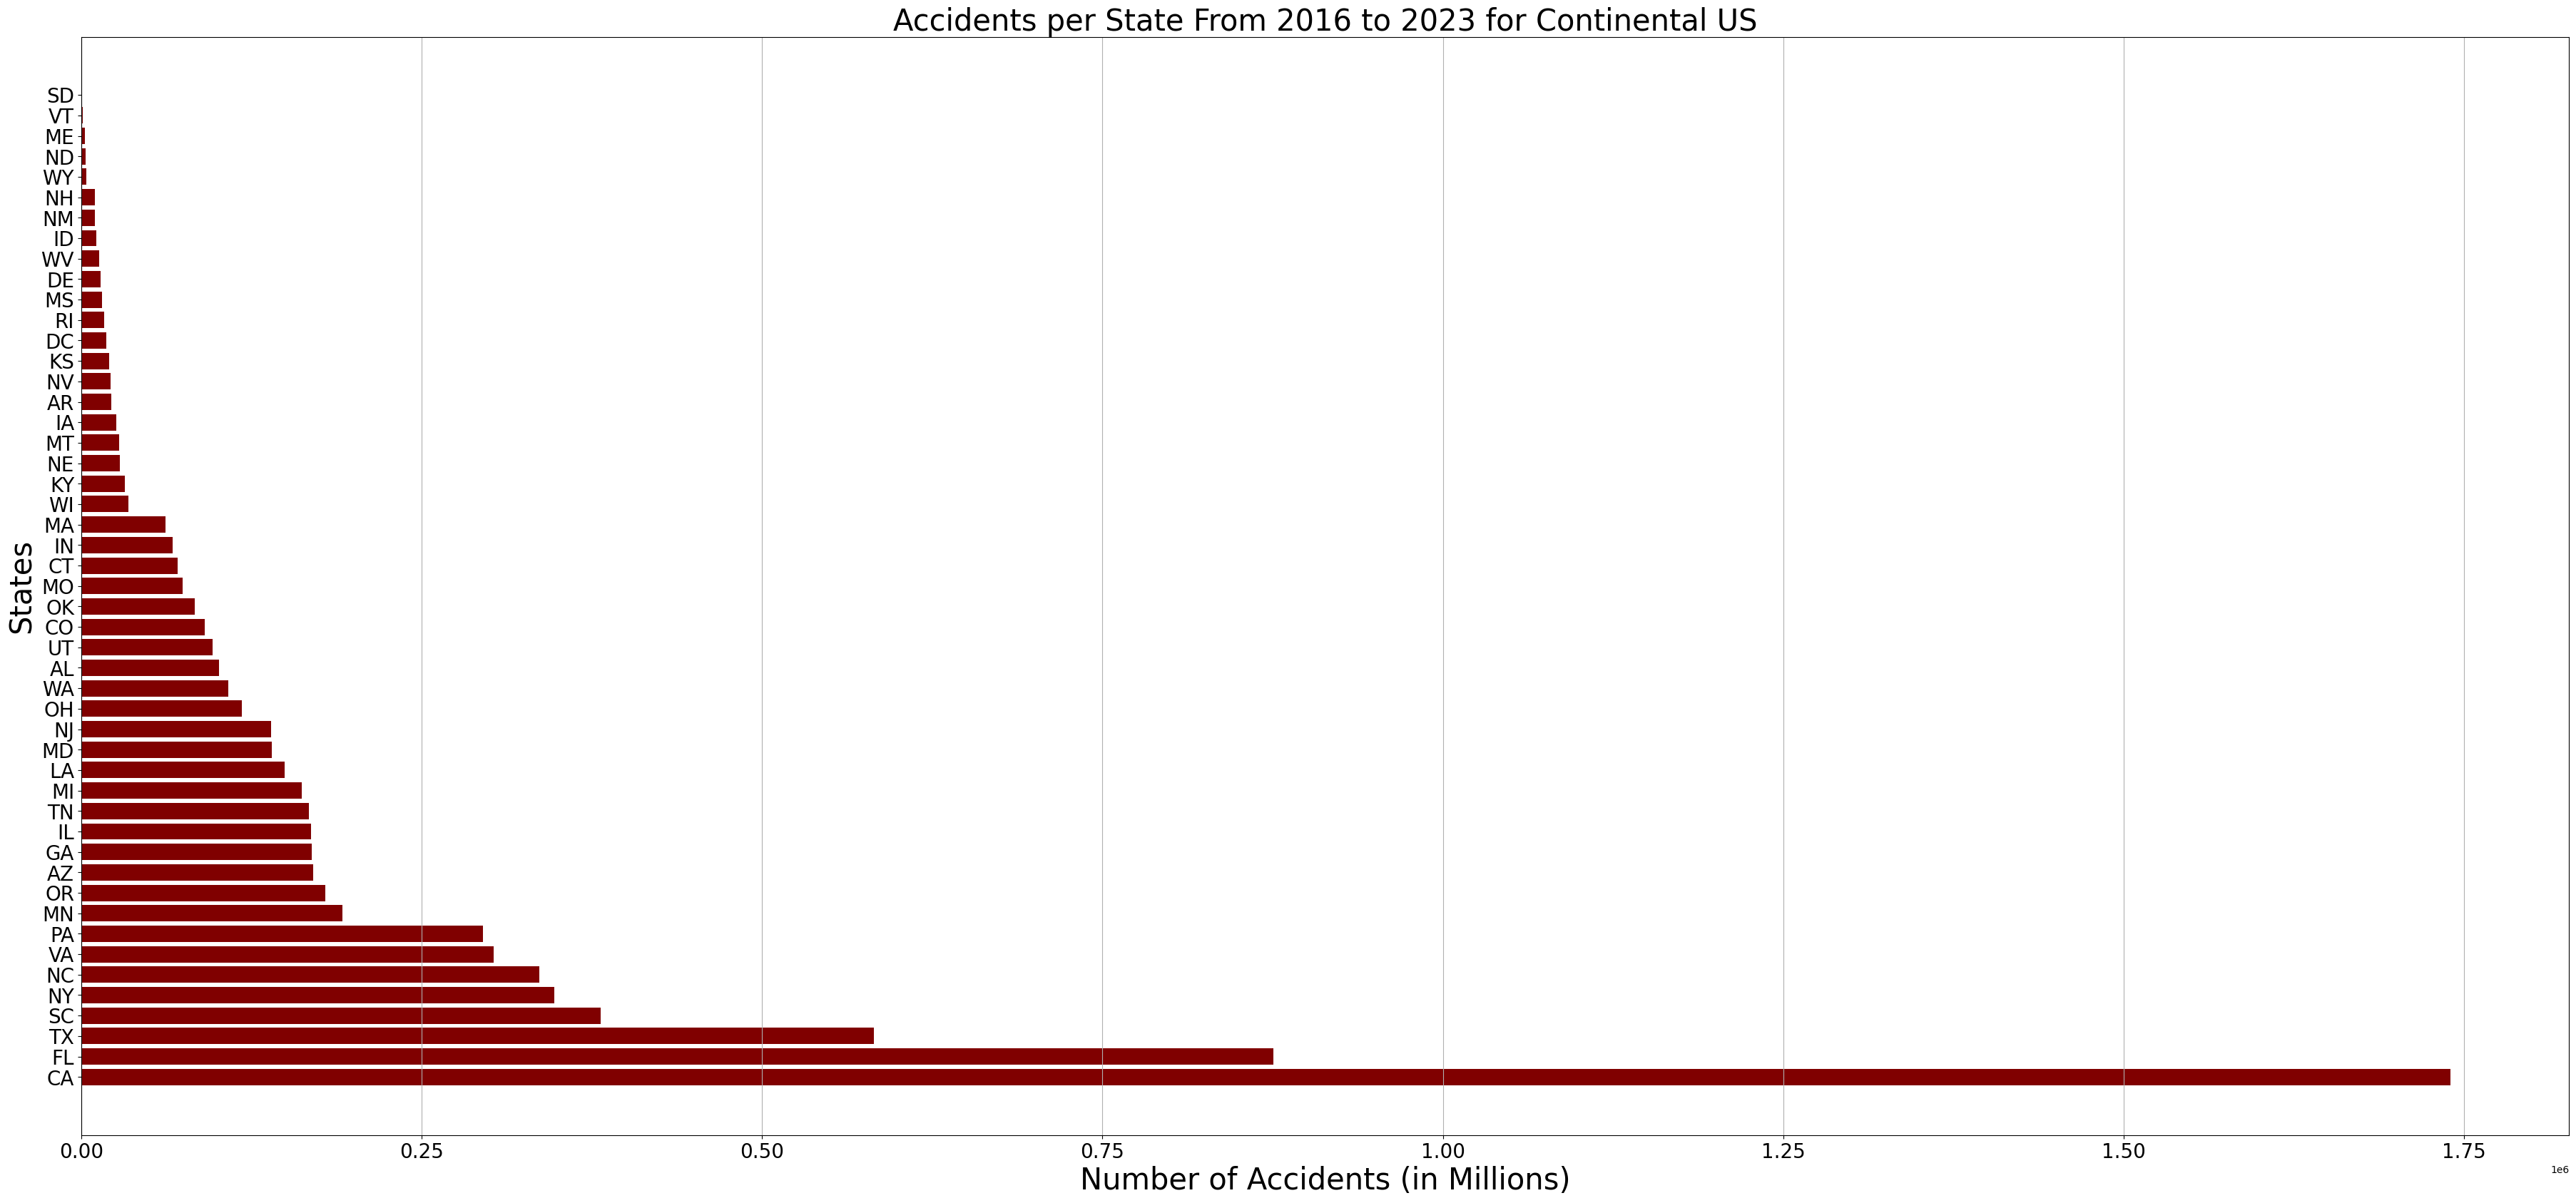

In [120]:
# Creating data set for graph and separating out axis data values 
accidentsPerStateTotalGraphData = dfAcc['State'].value_counts().to_dict()
accidentsPerStateTotalXAxis = list(accidentsPerStateTotalGraphData.keys())
accidentsPerStateTotalYAxis = list(accidentsPerStateTotalGraphData.values())

fig = plt.figure(figsize=(45,20))

# Creating the bar plot
plt.barh(accidentsPerStateTotalXAxis, accidentsPerStateTotalYAxis, color='maroon')

# Setting title and axis labels
plt.title('Accidents per State From 2016 to 2023 for Continental US', fontsize=30) # also changed label fontsize
plt.xlabel('Number of Accidents (in Millions)', fontsize=30) # also changed label fontsize
plt.xticks(fontsize=20) # changing x axis scale size
plt.ylabel('States', fontsize=30) # also changed label fontsize
plt.yticks(fontsize=20) # changing y axis label size
plt.grid(axis='x')
plt.show()

## Are Accidents More Common During the Day or Night?
In this chart we will review whether accidents are more common during the day or night

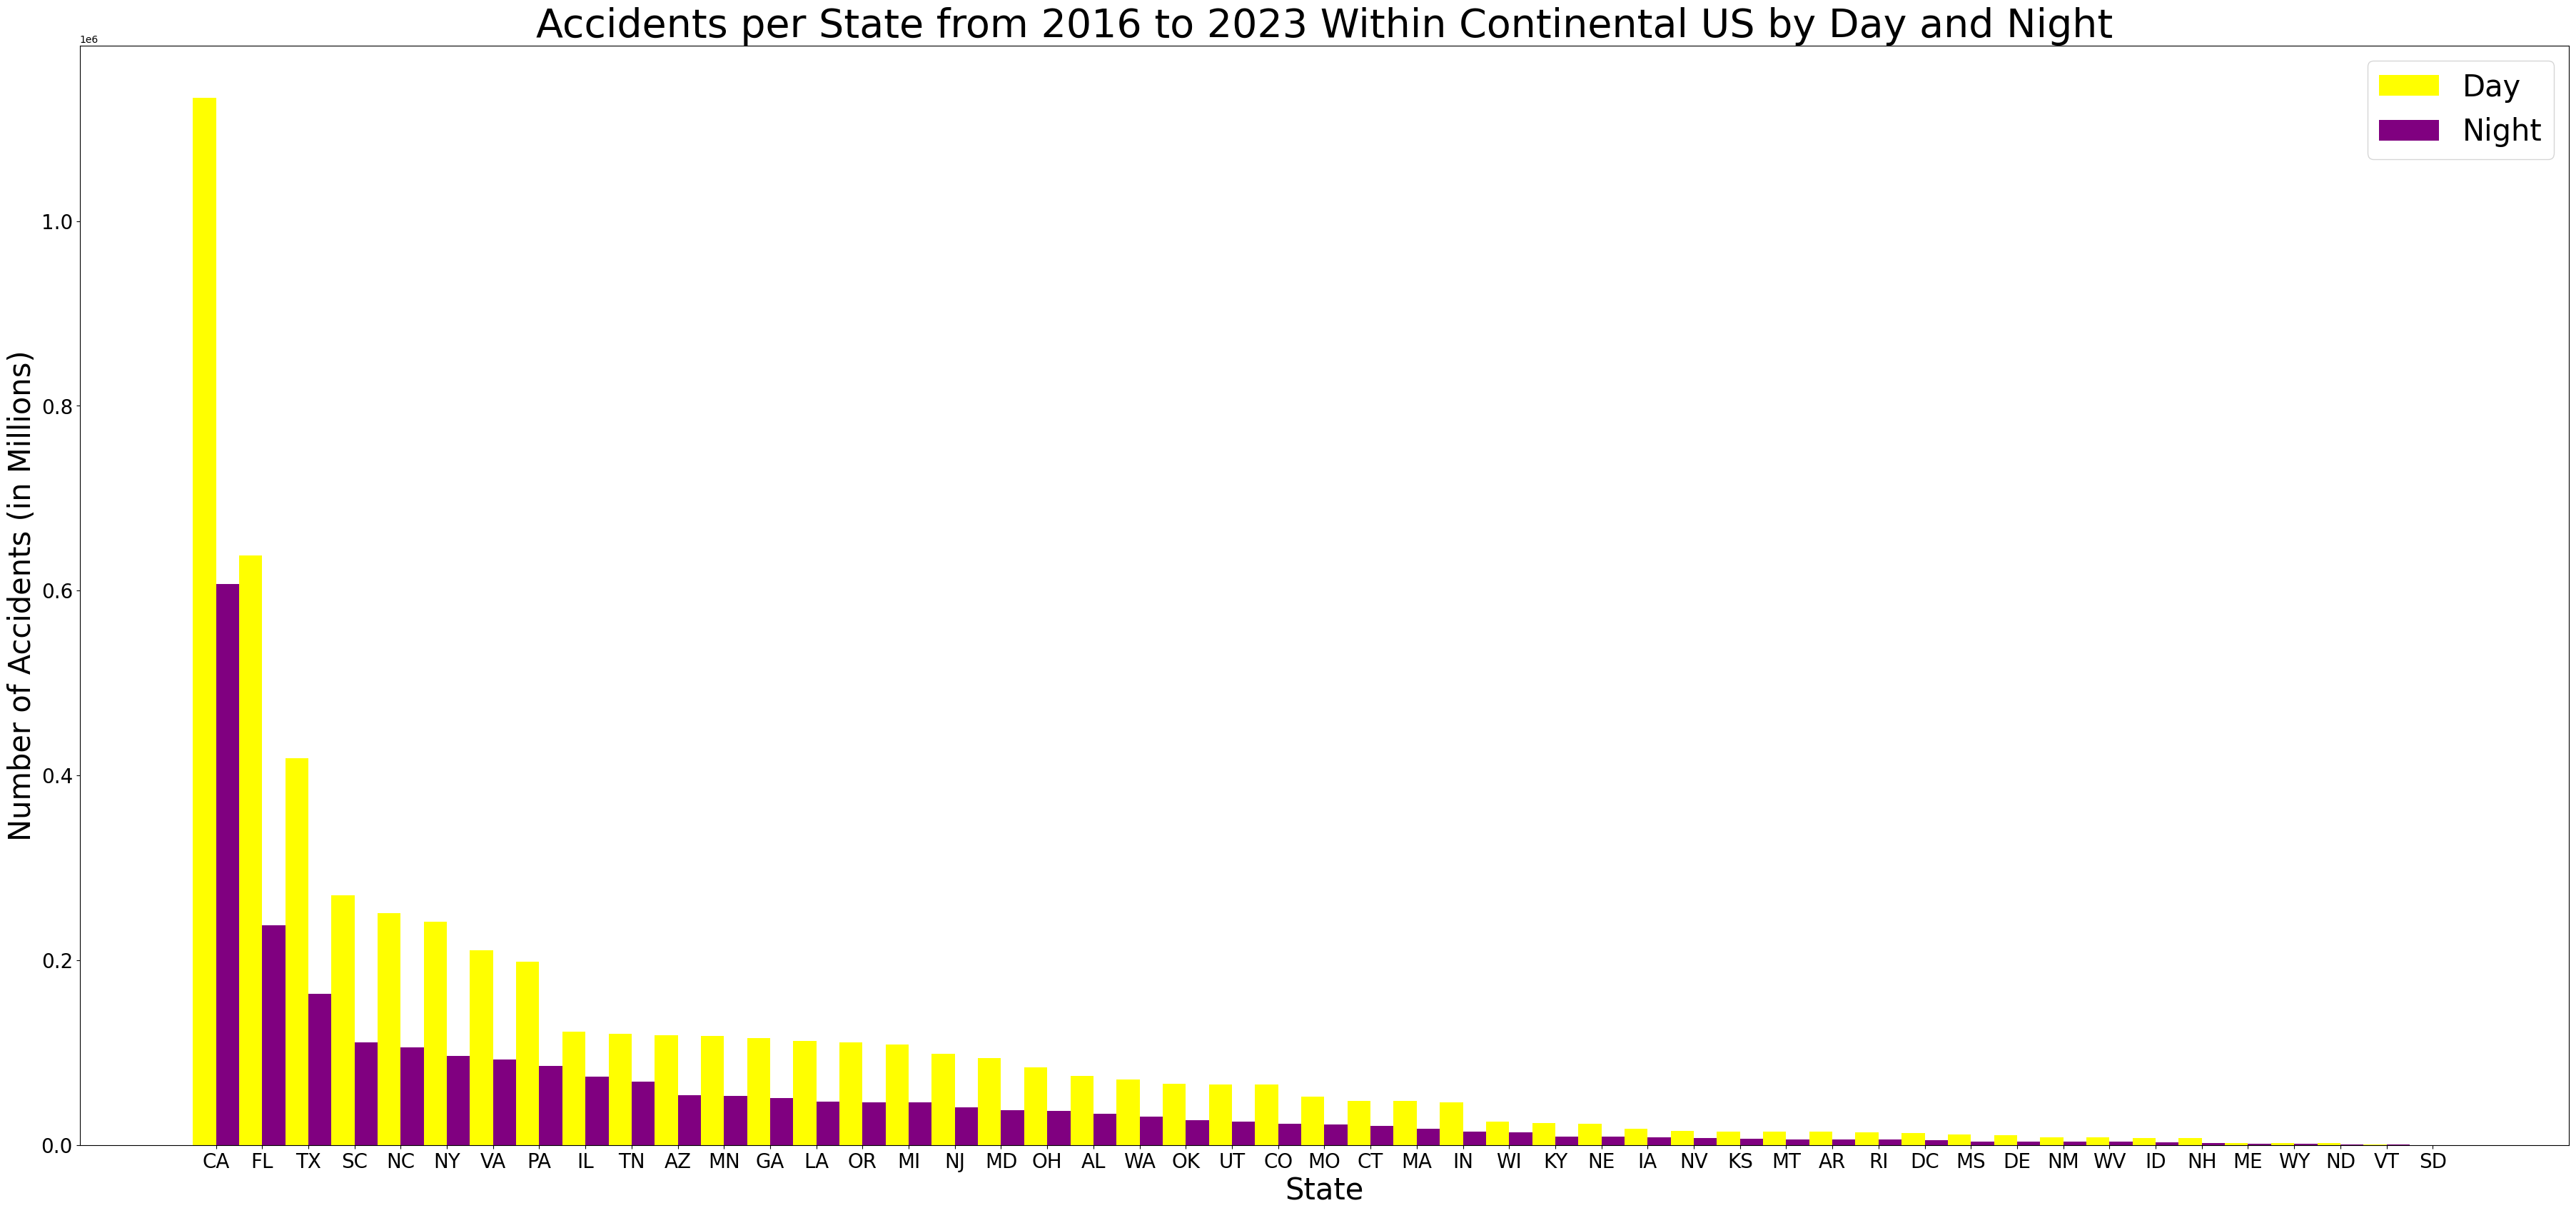

In [262]:
# Creating data set for graph and separating out axis data values

# Filtering the dataframe to only include rows where the value in the Day/Night column == Day
dfFilteredDay = dfAcc[dfAcc['Day/Night'] == 'Day']
# Filtering the dataframe to only include rows where the value in the Day/Night column == Night
dfFilteredNight = dfAcc[dfAcc['Day/Night'] == 'Night']

# Creating a dictionary with the value counts of accidents that occurred during the day
accidentsPerStateSunGraphDataDay = dfFilteredDay['State'].value_counts().to_dict()
# Creating a dictionary with the value counts of accidents that occurred during the night
accidentsPerStateSunGraphDataNight = dfFilteredNight['State'].value_counts().to_dict()

# Set width of bar
barWidth = 0.50
space = 0.25
fig = plt.subplots(figsize = (45, 20))

# Set height of bars
Day = list(accidentsPerStateSunGraphDataDay.values())
Night = list(accidentsPerStateSunGraphDataNight.values())

# Set position of bar on X axis
br1 = np.arange(len(Day))
br2 = [x + barWidth for x in br1]

# Make the plot
plt.bar(br1, Day, color='yellow', width=barWidth, label='Day')
plt.bar(br2, Night, color='purple', width=barWidth, label='Night')

# Adding Labels, Title, and setting font sizes
plt.title('Accidents per State from 2016 to 2023 Within Continental US by Day and Night', fontsize=40)
plt.xlabel('State', fontsize=30)
plt.xticks(ticks=[r + space for r in range(len(Day))],labels=list(accidentsPerStateSunGraphDataDay.keys()),fontsize=20)
plt.ylabel('Number of Accidents (in Millions)', fontsize=30)
plt.yticks(fontsize=20)
plt.yscale('linear')
plt.legend(fontsize=30)
plt.show()



## Accidents Per State Before and After Legalization
For those states where marijuana has been made legal in some form (medical or recreational), this shows the number of accidents before and after the date of legalization. The second graph shows the number of accidents before and after the date when it became legal to purchase marijuana in the state. 

Note: Due to the wide spread of legalization dates across those states that have made marijuana legal we are going to be looking at only two, Arizona and Illinois. Both of these states legalized marijuana in 2020. This will give us the largest and most equal dataset of accidents both before and after legalization. 

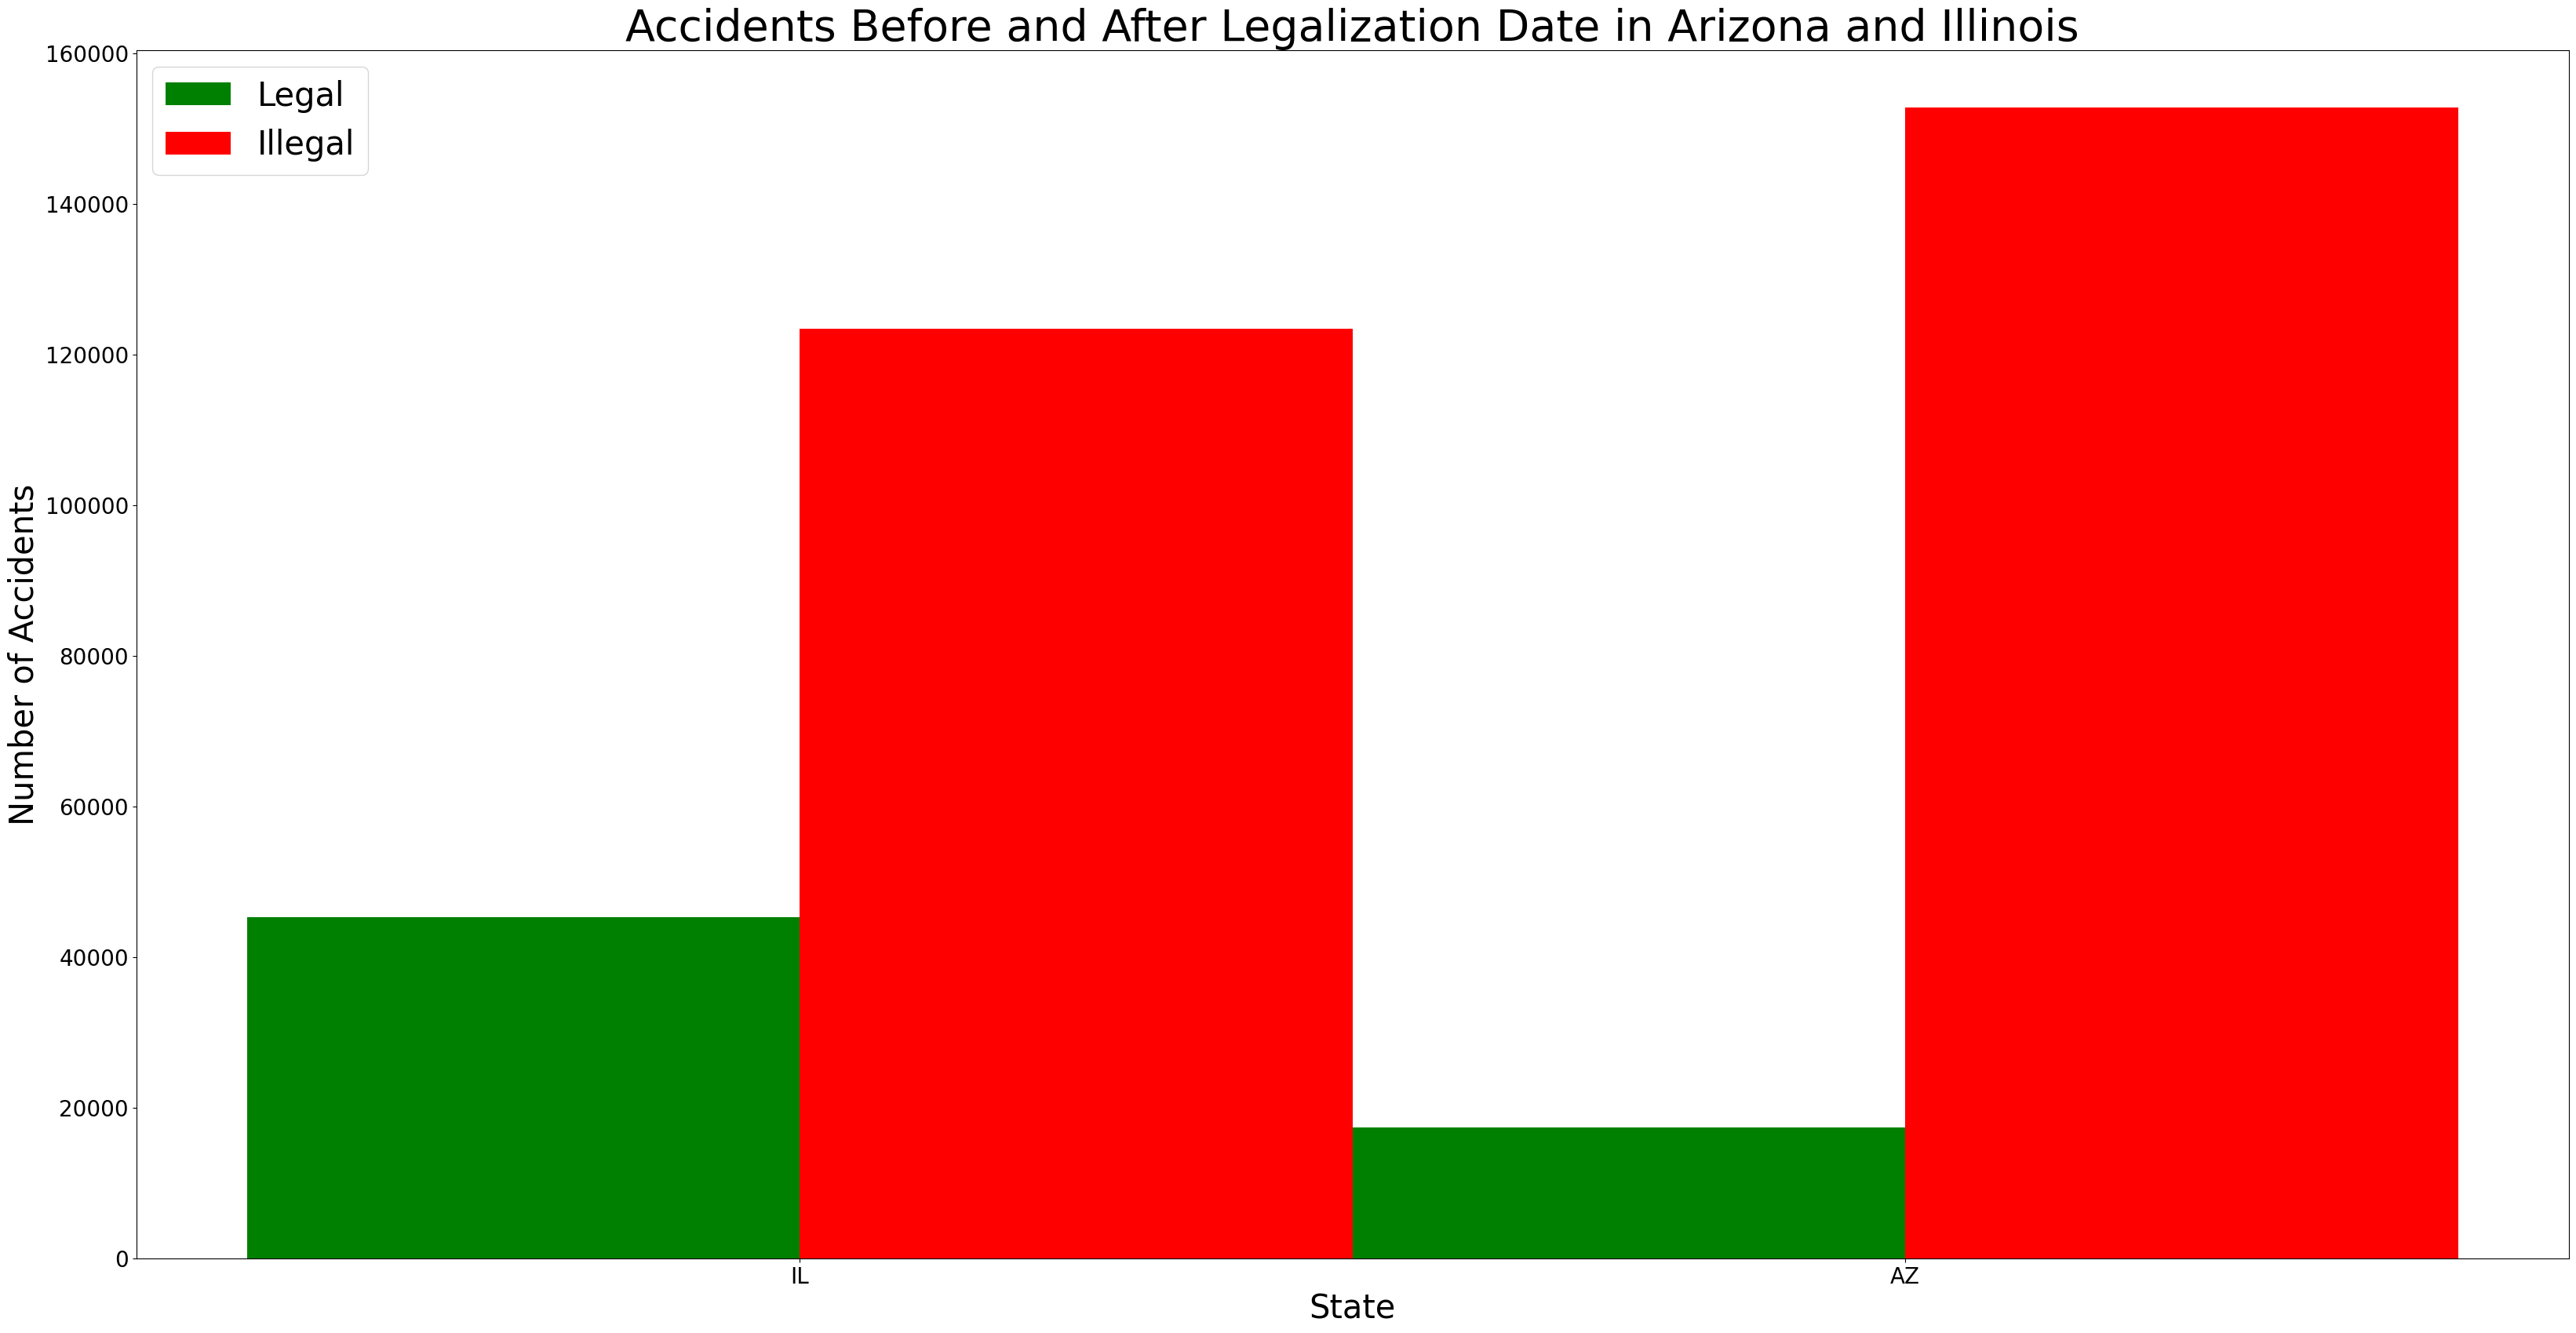

In [261]:
# Creating data set for graph and separating out axis data values

# Filtering the dataframe to only include rows where the value in the State column == AZ and IL
dfFilteredLegalAZ = dfAcc[dfAcc['State'] == 'AZ']
dfFilteredLegalIL = dfAcc[dfAcc['State'] == 'IL']

#Filtering the Accidents in IL to pre and post legality
dfFilteredILPre = dfFilteredLegalIL[dfFilteredLegalIL['Date'] < '1/1/2020']
dfFilteredILPost = dfFilteredLegalIL[dfFilteredLegalIL['Date'] >= '1/1/2020']

#Filtering the Accidents in AZ to pre and post legality
dfFilteredAZPre = dfFilteredLegalAZ[dfFilteredLegalAZ['Date'] < '11/30/2020']
dfFilteredAZPost = dfFilteredLegalAZ[dfFilteredLegalAZ['Date'] >= '11/30/2020']

# Creating dictionaries with number of accidents in each state pre and post legalization. This are individual dictionaries that we will combine later
accidentsILPre = dfFilteredILPre['State'].value_counts().to_dict()
accidentsILPost = dfFilteredILPost['State'].value_counts().to_dict()
accidentsAZPre = dfFilteredAZPre['State'].value_counts().to_dict()
accidentsAZPost = dfFilteredAZPost['State'].value_counts().to_dict()

# Creating emptry dictionaries to load the dictionaries created above into single entries
accidentsLegal = {}
accidentsIllegal = {}

# merging all pre legal dictionaries together and post legal dictionaries together
accidentsLegal.update(accidentsILPost)
accidentsLegal.update(accidentsAZPost)
accidentsIllegal.update(accidentsILPre)
accidentsIllegal.update(accidentsAZPre)

# Set width of bars
figLegal = plt.subplots(figsize=(40,20))

# Set height of bars
illegal = list(accidentsIllegal.values())
legal = list(accidentsLegal.values())

# Set position of bar on X axis
brLegal = np.arange(len(accidentsLegal))
brIllegal = [x + barWidth for x in brLegal]

# Make the plot
plt.bar(brLegal, legal, color='green', width=barWidth, label='Legal')
plt.bar(brIllegal, illegal, color='red', width=barWidth, label='Illegal')

# Adding Labels, Titles, and setting font sizes
plt.title('Accidents Before and After Legalization Date in Arizona and Illinois', fontsize=40)
plt.xlabel('State', fontsize=30)
plt.xticks(ticks=[r + space for r in range(len(illegal))],labels=accidentsIllegal,fontsize=20)
plt.ylabel('Number of Accidents', fontsize=30)
plt.yticks(fontsize=20)
plt.yscale('linear')
plt.legend(fontsize=30)
plt.show()

